# 1. Read in Data, Filter Noise & Format Data

## Read in Data

In [1]:
# import dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt # visualizations
import re # regex
import string # handle string
import math # perform mathematical operations
import nltk

# load & format data
# data file used here is on google drive (not on github because file size is too large)
# contains both cleaned text columns and their original contents
df_cleantext = pd.read_csv("C:\\Users\\20jam\\Documents\\github\\my-code\\clean_fulldata.csv")
df = df_cleantext[["id", "subreddit", "title", "score", "selftext", "clean_selftext", "upvote_ratio", "created_utc"]]
df

id          subreddit  \
0      ng6k8b       askSingapore   
1      mfnwal  NationalServiceSG   
2      l0ac4u       askSingapore   
3      kzrgon            SGExams   
4      kwbxjs  NationalServiceSG   
...       ...                ...   
12605  g81nb4          singapore   
12606  b0hzfi          singapore   
12607  ap5vn0          singapore   
12608  dopbox          singapore   
12609  a21gtg          singapore   

                                                   title  score  \
0      Anyone know where to get tested as an Adult fo...      8   
1                           Help for adjustment disorder      5   
2            Where to get assessed for eating disorders?     42   
3                                [RANT] Mental disorders     44   
4                       Downpes from adjustment disorder     21   
...                                                  ...    ...   
12605                 If there is a vaccine, whats next?      2   
12606                                  Influenza Vaccine      7   
12607  [ladies] HPV vaccination - y/n, experience, co...      1   
12608  Planning to go back to SG this December. Polio...      0   
12609  Just got scammed by MLM and lost money, what t...      1   

                                                selftext  \
0      I know mostly these tests are for children. Bu...   
1      People say half the war is won when you report...   
2      I might have an eating disorder, I don’t know ...   
3      After o's I have this long period of time to s...   
4      Facing severe adjustment problems, had a menta...   
...                                                  ...   
12605  Tbh I havent kept up with the vaccine developm...   
12606  Are there different brands of the vaccine avai...   
12607  Currently researching the vaccination and wond...   
12608  I checked a couple of sites including your Min...   
12609  I just lost $1688 to an MLM company called ICS...   

                                          clean_selftext  upvote_ratio  \
0      know mostly test child really need know wrong ...          0.84   
1      people say half war report mental illness long...          0.86   
2      might eating disorder know want self diagnose ...          1.00   
3      ofs long period time sit really reflect unsolv...          0.95   
4      facing severe adjustment problem mental breakd...          0.90   
...                                                  ...           ...   
12605  tbh kept vaccine development news want generat...          0.54   
12606  different brand vaccine available difference g...          0.71   
12607  currently researching vaccination wondering ma...          0.73   
12608  checked couple site including ministry health ...          0.56   
12609  lost mlm company called icsi care system feel ...          0.95   

      created_utc  
0      2021-05-19  
1      2021-03-29  
2      2021-01-19  
3      2021-01-18  
4      2021-01-13  
...           ...  
12605  2020-04-25  
12606  2019-03-13  
12607  2019-02-10  
12608  2019-10-29  
12609  2018-12-01  

[12610 rows x 8 columns]

## Filter out noise

In [2]:
# remove non english words, abbreviations incomprehensible words
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
for rowIndex, row in df.iterrows():
    try:
        string = row["clean_selftext"]
        new_string = " ".join(w for w in nltk.wordpunct_tokenize(string) if w.lower() in words or not w.isalpha())
        df.loc[rowIndex, "clean_selftext"] = new_string
    except:
        df.loc[rowIndex, "clean_selftext"] = ""
df["clean_selftext"]

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\20jam\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0        know mostly test child really need know wrong ...
1        people say half war report mental illness long...
2        might eating disorder know want self diagnose ...
3        long period time sit really reflect unsolvable...
4        facing severe adjustment problem mental breakd...
                               ...                        
12605    kept vaccine development news want generate di...
12606    different brand vaccine available difference g...
12607    currently vaccination wondering many gotten on...
12608    checked couple site ministry health could find...
12609    lost company care system feel like retard pay ...
Name: clean_selftext, Length: 12610, dtype: object

## Format data

In [3]:
text_df = df[["subreddit", "selftext", "clean_selftext"]]
df_grouped = text_df.groupby(by = 'subreddit').agg(lambda x: x.str.cat(sep = " "))
print(df_grouped)

# create document term matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = 'word')
data = cv.fit_transform(df_grouped['clean_selftext'])
df_dtm = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
df_dtm.index = df_grouped.index
df_dtm.head()

                                                            selftext  \
subreddit                                                              
MentalHealthSG     Hey everyone, hope you are doing alright. \r\n...   
NTU                TLDR: Am interested in some HP3xxx development...   
NationalServiceSG  People say half the war is won when you report...   
SGExams            After o's I have this long period of time to s...   
SingaporePoly      Hi,\r\n\r\nDoes anyone know ITE and Polytechni...   
SingaporeRaw        \r\n\r\nDuring these unusual times of our liv...   
askSingapore       I know mostly these tests are for children. Bu...   
nus                An incoming 3rd-year FASS double major + USP\r...   
singapore          As a teen, I found sex ed rather adequate. It ...   
singaporefi        If you have no dependents, instead of buying l...   

                                                      clean_selftext  
subreddit                                                       

aa  aal  aba  aback  abacus  abandon  abandoned  \
subreddit                                                            
MentalHealthSG      0    0    0      0       0        0          1   
NTU                 1    0    0      0       0        0          0   
NationalServiceSG   2    0    0      1       0        0          0   
SGExams            22    0   86      4       0        3          4   
SingaporePoly       0    0    0      0       0        0          0   

                   abandonment  abatement  abattoir  ...  zoning  zoo  \
subreddit                                            ...                
MentalHealthSG               1          0         0  ...       0    0   
NTU                          0          0         0  ...       0    0   
NationalServiceSG            0          0         0  ...       0    0   
SGExams                      1          0         0  ...      12    6   
SingaporePoly                0          0         0  ...       0    0   

                   zoologist  zoom  zoonotic  zoophilia  zoophilic  zoster  \
subreddit                                                                    
MentalHealthSG             0     0         0          0          0       0   
NTU                        0    47         0          0          0       0   
NationalServiceSG          0     2         0          0          0       0   
SGExams                    0   247         0          0          0       1   
SingaporePoly              0     1         0          0          0       0   

                   zowie  zygote  
subreddit                         
MentalHealthSG         0       0  
NTU                    0       0  
NationalServiceSG      0       0  
SGExams                0       1  
SingaporePoly          0       0  

[5 rows x 18324 columns]

# 2. Ngram Analysis (Comparison btw Pre & Mid Covid)

## For Pre-Covid Posts

"\n# alternative way to display most commonly used single words\ncorpus = []\nnew = df['clean_selftext'].str.split()\nnew = new.values.tolist()\nfor i in new:\n    if type(i) == list:\n        for word in i:\n                corpus.append(word)\n\nfrom collections import Counter\ncounter = Counter(corpus)\nmost = counter.most_common()\nx, y= [], []\nfor word, count in most[:40]:\n    x.append(word)\n    y.append(count)\n    \nsns.barplot(x = y, y = x)\n"

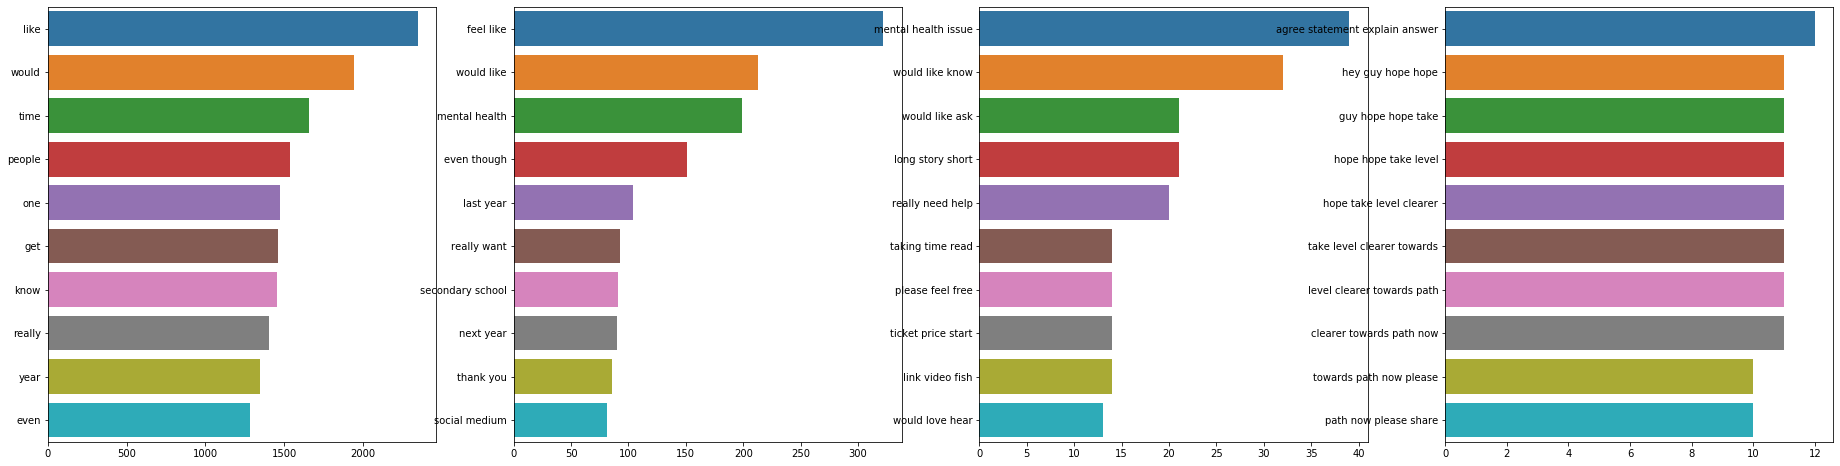

In [4]:
# ngram analysis for pre-covid posts
import datetime
import seaborn as sns
def get_top_ngram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:10]

input = df.dropna(subset = ["clean_selftext"])
pre = input[input["created_utc"] < "2020-01-01"]
fig, axs = plt.subplots(ncols = 4, figsize = (32, 8))
top_n_bigrams = get_top_ngram(pre["clean_selftext"], 1)
x,y = map(list, zip(*top_n_bigrams)) 
sns.barplot(x = y, y = x, ax = axs[0])
top_n_bigrams = get_top_ngram(pre["clean_selftext"], 2)
x,y = map(list, zip(*top_n_bigrams)) 
sns.barplot(x = y, y = x, ax = axs[1])
top_tri_grams=get_top_ngram(pre["clean_selftext"], n = 3)
x,y = map(list, zip(*top_tri_grams))
sns.barplot(x = y, y = x, ax = axs[2])
top_quad_grams=get_top_ngram(pre["clean_selftext"], n = 4)
x,y = map(list, zip(*top_quad_grams))
sns.barplot(x = y, y = x, ax = axs[3])

"""
# alternative way to display most commonly used single words
corpus = []
new = df['clean_selftext'].str.split()
new = new.values.tolist()
for i in new:
    if type(i) == list:
        for word in i:
                corpus.append(word)

from collections import Counter
counter = Counter(corpus)
most = counter.most_common()
x, y= [], []
for word, count in most[:40]:
    x.append(word)
    y.append(count)
    
sns.barplot(x = y, y = x)
"""

## For Mid-Covid Posts

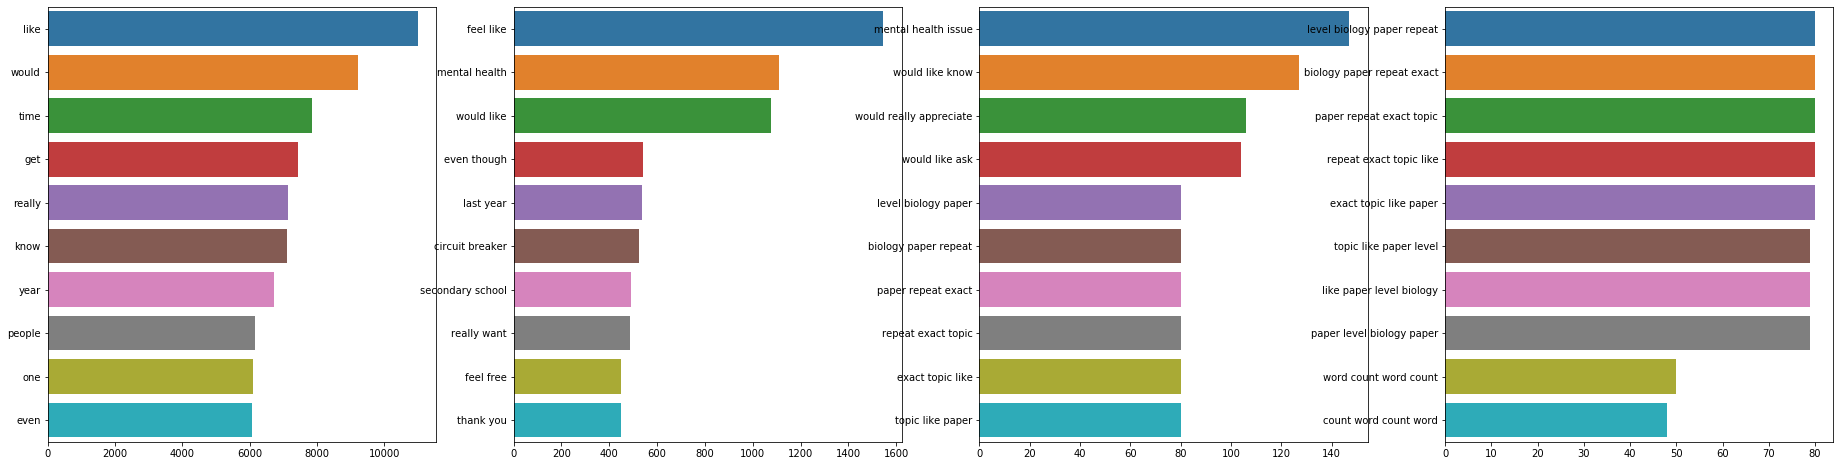

In [5]:
# ngram analysis for mid-covid posts
input = df.dropna(subset = ["clean_selftext"])
mid = input[input["created_utc"] > "2020-01-01"]
fig, axs = plt.subplots(ncols = 4, figsize = (32, 8))
top_n_bigrams = get_top_ngram(mid["clean_selftext"], 1)
x,y = map(list, zip(*top_n_bigrams)) 
sns.barplot(x = y, y = x, ax = axs[0])
top_n_bigrams = get_top_ngram(mid["clean_selftext"], 2)
x,y = map(list, zip(*top_n_bigrams)) 
sns.barplot(x = y, y = x, ax = axs[1])
top_tri_grams=get_top_ngram(mid["clean_selftext"], n = 3)
x,y = map(list, zip(*top_tri_grams))
sns.barplot(x = y, y = x, ax = axs[2])
top_quad_grams=get_top_ngram(mid["clean_selftext"], n = 4)
x,y = map(list, zip(*top_quad_grams))
sns.barplot(x = y, y = x, ax = axs[3])

# 3. WordCloud (Comparison btw Pre & Mid Covid for every Subreddit)

## Further filter words which do not contribute to giving insight about subject matter at hand

In [6]:
# permanently remove rows with empty clean_selftext
df = df[df["clean_selftext"] != ""]
df

id          subreddit  \
0      ng6k8b       askSingapore   
1      mfnwal  NationalServiceSG   
2      l0ac4u       askSingapore   
3      kzrgon            SGExams   
4      kwbxjs  NationalServiceSG   
...       ...                ...   
12605  g81nb4          singapore   
12606  b0hzfi          singapore   
12607  ap5vn0          singapore   
12608  dopbox          singapore   
12609  a21gtg          singapore   

                                                   title  score  \
0      Anyone know where to get tested as an Adult fo...      8   
1                           Help for adjustment disorder      5   
2            Where to get assessed for eating disorders?     42   
3                                [RANT] Mental disorders     44   
4                       Downpes from adjustment disorder     21   
...                                                  ...    ...   
12605                 If there is a vaccine, whats next?      2   
12606                                  Influenza Vaccine      7   
12607  [ladies] HPV vaccination - y/n, experience, co...      1   
12608  Planning to go back to SG this December. Polio...      0   
12609  Just got scammed by MLM and lost money, what t...      1   

                                                selftext  \
0      I know mostly these tests are for children. Bu...   
1      People say half the war is won when you report...   
2      I might have an eating disorder, I don’t know ...   
3      After o's I have this long period of time to s...   
4      Facing severe adjustment problems, had a menta...   
...                                                  ...   
12605  Tbh I havent kept up with the vaccine developm...   
12606  Are there different brands of the vaccine avai...   
12607  Currently researching the vaccination and wond...   
12608  I checked a couple of sites including your Min...   
12609  I just lost $1688 to an MLM company called ICS...   

                                          clean_selftext  upvote_ratio  \
0      know mostly test child really need know wrong ...          0.84   
1      people say half war report mental illness long...          0.86   
2      might eating disorder know want self diagnose ...          1.00   
3      long period time sit really reflect unsolvable...          0.95   
4      facing severe adjustment problem mental breakd...          0.90   
...                                                  ...           ...   
12605  kept vaccine development news want generate di...          0.54   
12606  different brand vaccine available difference g...          0.71   
12607  currently vaccination wondering many gotten on...          0.73   
12608  checked couple site ministry health could find...          0.56   
12609  lost company care system feel like retard pay ...          0.95   

      created_utc  
0      2021-05-19  
1      2021-03-29  
2      2021-01-19  
3      2021-01-18  
4      2021-01-13  
...           ...  
12605  2020-04-25  
12606  2019-03-13  
12607  2019-02-10  
12608  2019-10-29  
12609  2018-12-01  

[12509 rows x 8 columns]

In [7]:
# keep only noun (N), verb (V)
import nltk
subject = []
def get_subject(txt):
    matter =  " ".join([word for (word, pos) in nltk.pos_tag(nltk.word_tokenize(txt)) if pos[0] in ["N", "V"]])
    subject.append(matter)
for rowIndex, row in df.iterrows():
    get_subject(row["clean_selftext"])
# print(len(subject))
# print(subject)
df["clean subject matter"] = subject
df

C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


id          subreddit  \
0      ng6k8b       askSingapore   
1      mfnwal  NationalServiceSG   
2      l0ac4u       askSingapore   
3      kzrgon            SGExams   
4      kwbxjs  NationalServiceSG   
...       ...                ...   
12605  g81nb4          singapore   
12606  b0hzfi          singapore   
12607  ap5vn0          singapore   
12608  dopbox          singapore   
12609  a21gtg          singapore   

                                                   title  score  \
0      Anyone know where to get tested as an Adult fo...      8   
1                           Help for adjustment disorder      5   
2            Where to get assessed for eating disorders?     42   
3                                [RANT] Mental disorders     44   
4                       Downpes from adjustment disorder     21   
...                                                  ...    ...   
12605                 If there is a vaccine, whats next?      2   
12606                                  Influenza Vaccine      7   
12607  [ladies] HPV vaccination - y/n, experience, co...      1   
12608  Planning to go back to SG this December. Polio...      0   
12609  Just got scammed by MLM and lost money, what t...      1   

                                                selftext  \
0      I know mostly these tests are for children. Bu...   
1      People say half the war is won when you report...   
2      I might have an eating disorder, I don’t know ...   
3      After o's I have this long period of time to s...   
4      Facing severe adjustment problems, had a menta...   
...                                                  ...   
12605  Tbh I havent kept up with the vaccine developm...   
12606  Are there different brands of the vaccine avai...   
12607  Currently researching the vaccination and wond...   
12608  I checked a couple of sites including your Min...   
12609  I just lost $1688 to an MLM company called ICS...   

                                          clean_selftext  upvote_ratio  \
0      know mostly test child really need know wrong ...          0.84   
1      people say half war report mental illness long...          0.86   
2      might eating disorder know want self diagnose ...          1.00   
3      long period time sit really reflect unsolvable...          0.95   
4      facing severe adjustment problem mental breakd...          0.90   
...                                                  ...           ...   
12605  kept vaccine development news want generate di...          0.54   
12606  different brand vaccine available difference g...          0.71   
12607  currently vaccination wondering many gotten on...          0.73   
12608  checked couple site ministry health could find...          0.56   
12609  lost company care system feel like retard pay ...          0.95   

      created_utc                               clean subject matter  
0      2021-05-19  know child need know college age extreme diffi...  
1      2021-03-29  people say war report illness take get help we...  
2      2021-01-19  eating disorder want eating habit told disorde...  
3      2021-01-18  period time sit conflict feel anxiety disorder...  
4      2021-01-13  facing adjustment problem mental breakdown par...  
...           ...                                                ...  
12605  2020-04-25  vaccine development news want discussion vacci...  
12606  2019-03-13  brand vaccine difference going friend claim of...  
12607  2019-02-10  vaccination wondering gotten chose claim th bi...  
12608  2019-10-29  couple site ministry health find information b...  
12609  2018-12-01  lost company care system feel retard pay help ...  

[12509 rows x 9 columns]

In [8]:
# remove any additional words manually (edit this accordingly to rm words you see in wordcloud but do not want in)
filter = ["get", "go", "going", "got", "hi"]
def rm_words(txt):
    return " ".join([word for word in nltk.word_tokenize(txt) if word not in filter])
for rowIndex, row in df.iterrows():
    df.loc[rowIndex, "clean subject matter"] = rm_words(row["clean subject matter"])

C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## Word Clouds for Individual Subreddit before Covid

In [9]:
# pre-covid
pre_subject = df[df["created_utc"] < "2020-01-01"]
text_df = pre_subject[["subreddit", "clean subject matter"]]
df_grouped = text_df.groupby(by = 'subreddit').agg(lambda x: x.str.cat(sep = " "))

# create document term matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = "word")
data = cv.fit_transform(df_grouped["clean subject matter"])
df_dtm = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
df_dtm.index = df_grouped.index

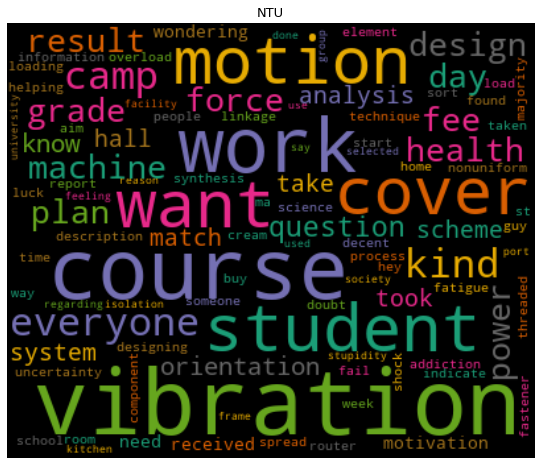

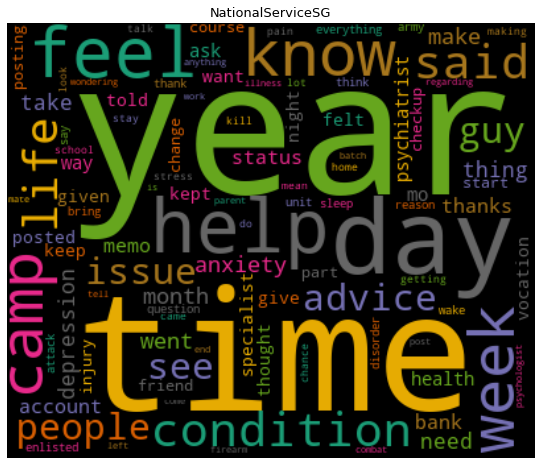

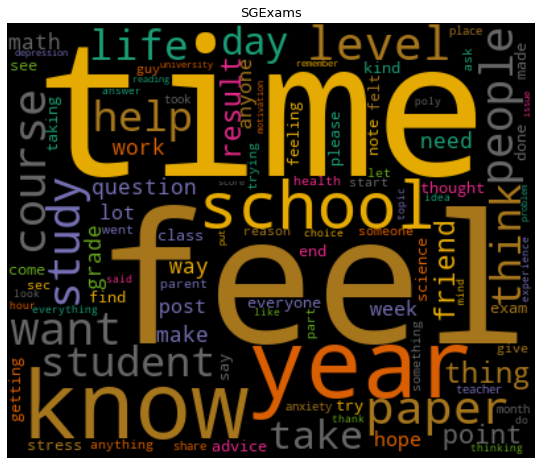

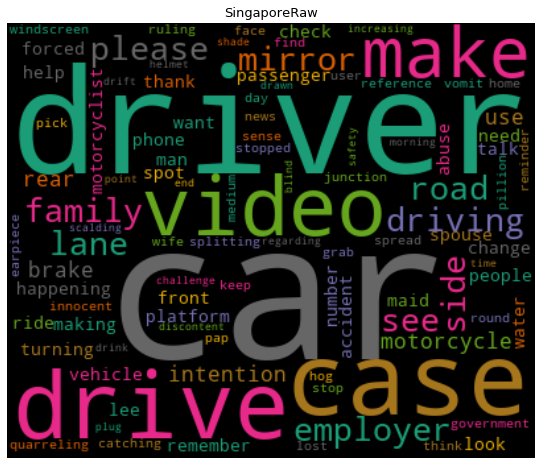

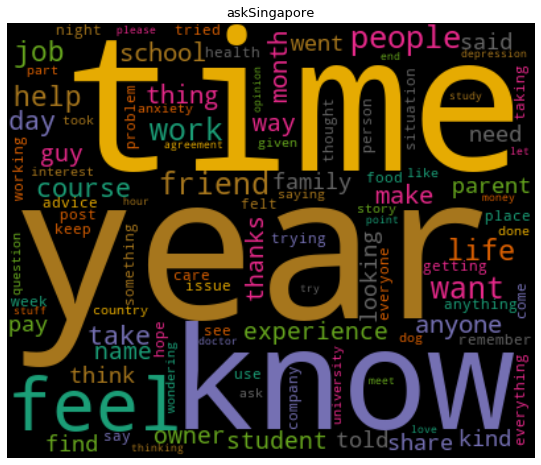

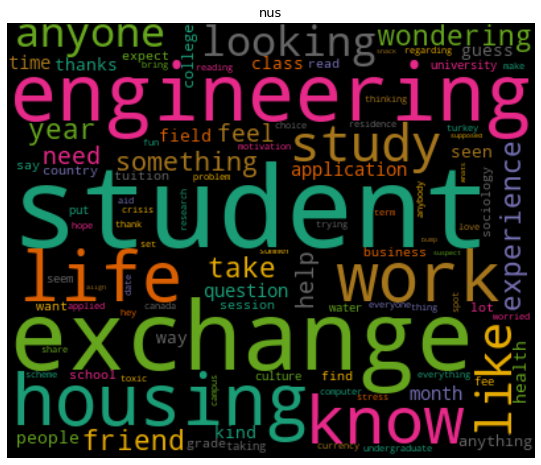

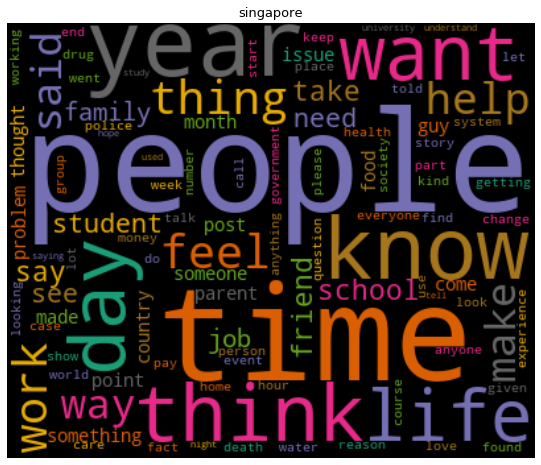

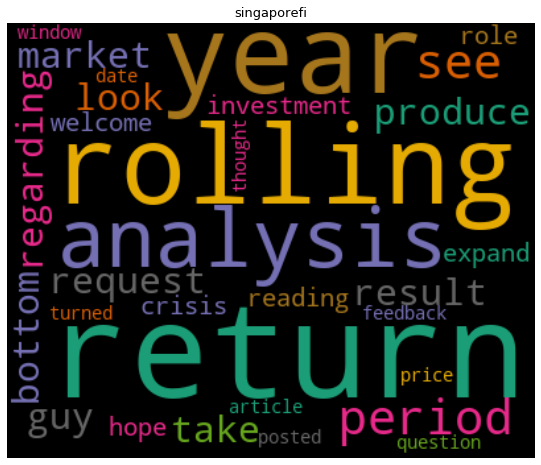

In [10]:
# generate wordcloud
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width = 400, height = 330, max_words = 100, colormap = "Dark2").generate_from_frequencies(data)
  plt.figure(figsize = (10,8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)), fontsize = 13)
  plt.show()
  
# transpose document term matrix
df_dtm = df_dtm.transpose()

# plotting word cloud for subreddit
for index, product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending = False), product)

## Word Cloud for Individual Subreddit during Covid

In [11]:
# mid-covid
mid_subject = df[df["created_utc"] > "2020-01-01"]
text_df = mid_subject[["subreddit", "clean subject matter"]]
df_grouped = text_df.groupby(by = "subreddit").agg(lambda x: x.str.cat(sep = " "))

# create document term matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = "word")
data = cv.fit_transform(df_grouped["clean subject matter"])
df_dtm = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
df_dtm.index = df_grouped.index

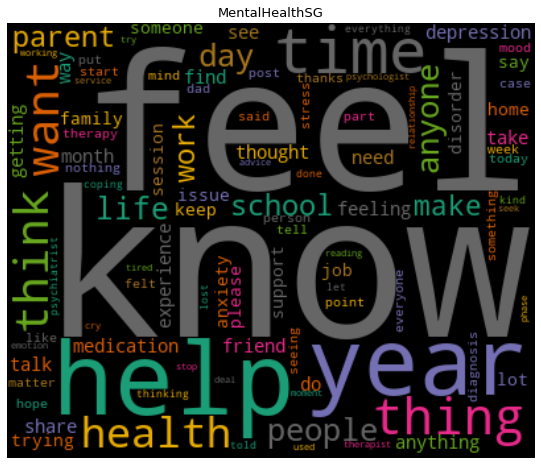

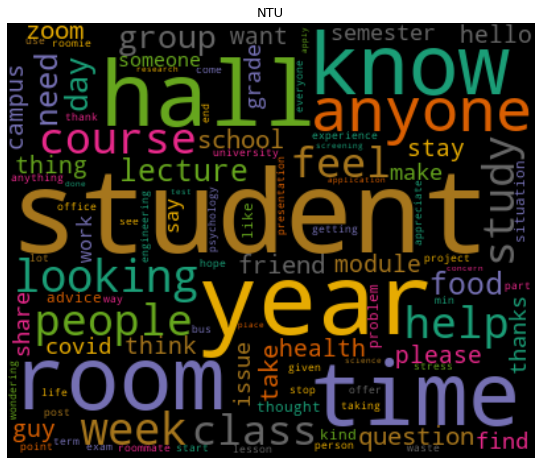

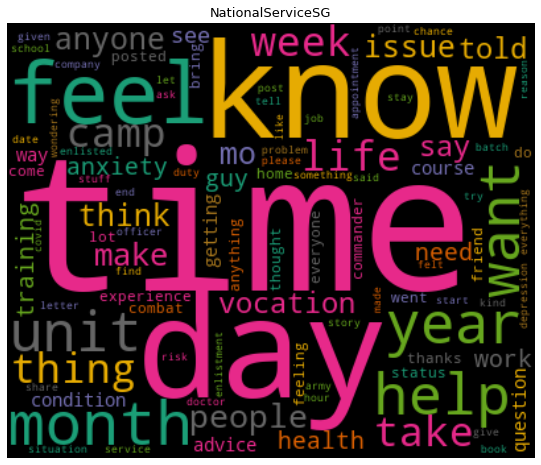

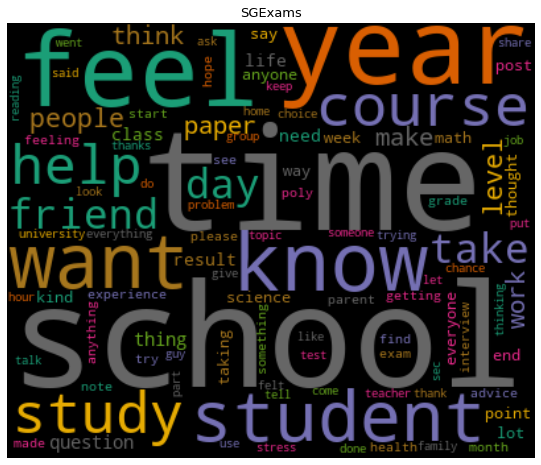

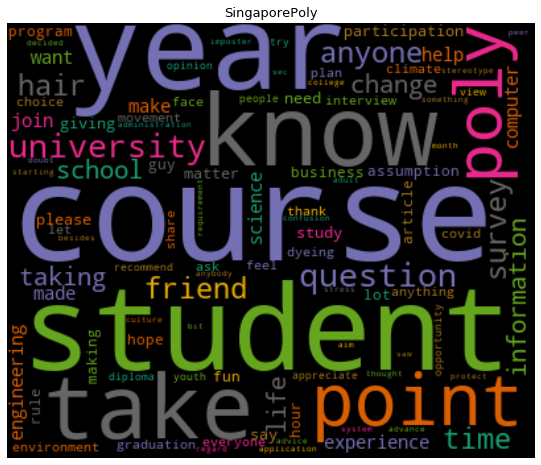

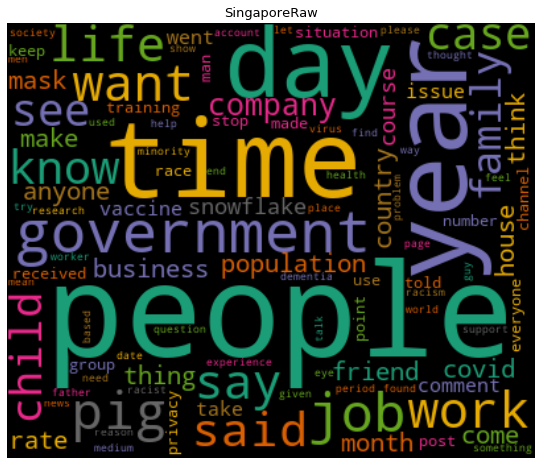

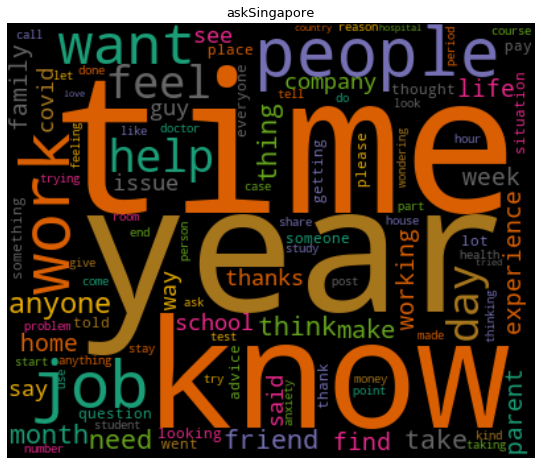

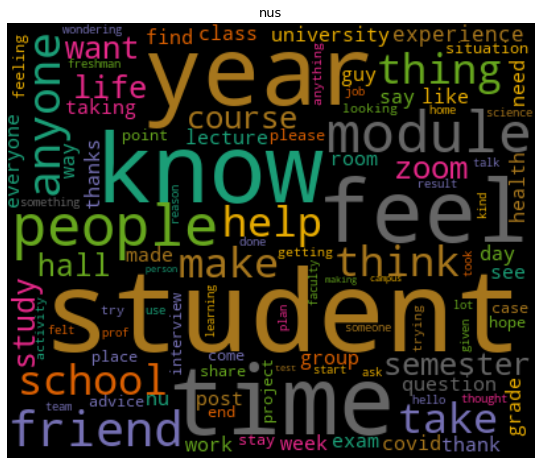

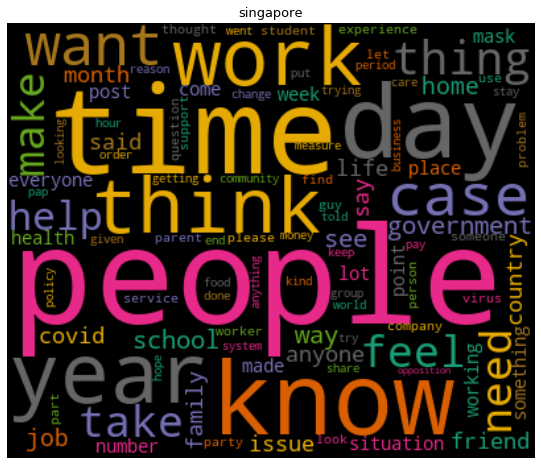

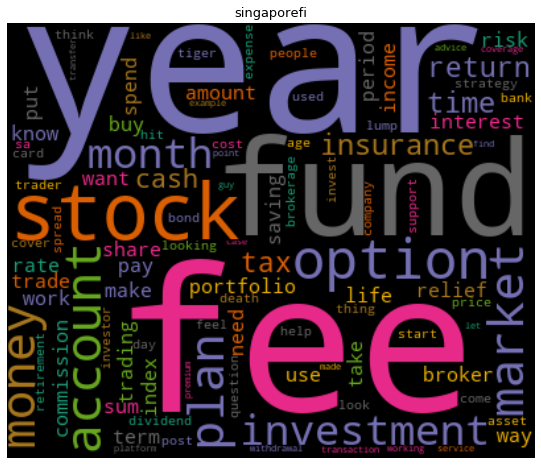

In [12]:
# generate wordcloud
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width = 400, height = 330, max_words = 100, colormap = "Dark2").generate_from_frequencies(data)
  plt.figure(figsize = (10,8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)), fontsize = 13)
  plt.show()
  
# transpose document term matrix
df_dtm = df_dtm.transpose()

# plotting word cloud for subreddit
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending = False), product)

# 4. Sentiment Polarity Analysis

## Top 3 Post with Highest & Lowest Polarity Score 

In [13]:
# calculate sentiment polarity
# using clean_selftext not subject matter because we wou
from textblob import TextBlob
def polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        if type(text) == float:
            pass
df['polarity'] = df["clean subject matter"].apply(lambda x: polarity(x))

# view top (from bottom and above) output of sentiment polarity analysis
print("Top 3 Most Positive Posts:")
for rowIndex, row in df.sort_values(by = ["polarity"], ascending = False).head(3).iterrows():
    content = " ".join(row["selftext"].split())
    print("POST INDEX {}: \n".format(rowIndex + 1), content)
    print()
print()
print()
print("Top 3 Most Negative Posts:")
for rowIndex, row in df.sort_values(by = ["polarity"], ascending = True).head(3).iterrows():
    content = " ".join(row["selftext"].split())
    print("POST INDEX {}: \n".format(rowIndex + 1), content)
    print()
"""
Alternatively: 
print("Top 3 Most Positive Posts:")
for index, txt in enumerate(df.iloc[df['polarity'].sort_values(ascending = False)[:3].index]["selftext"]):
  print('Post {}:\n'.format(index + 1), txt)
print()
print("Top 3 Most Negative Posts:")
for index, txt in enumerate(df.iloc[df['polarity'].sort_values(ascending = True)[:3].index]["selftext"]):
  print('Post {}:\n'.format(index + 1),txt)
"""


Top 3 Most Positive Posts:
POST INDEX 10611: 
 Inspired by the other previous posts! I got nothing to do so feel free to shoot me any questions at all. Subject Combination: H2 Physics, Chem, Math, Econs, H3 Econs and GP. I think I would be best at answering Physics, Math, Econs and GP questions, but I can certainly try with Chem. I don’t have any notes but if you need a recap on the core essentials of any chapter, I will try my best to summarise it for you. Not only that, but I understand that some people might be interested in applying to university overseas. I am well-versed in the details of US uni applications, and I know some details about UK uni applications. It’s a pretty stressful time now and I want to do my best to encourage and provide guidance for juniors who are interested in this pathway. Other than that, any other miscellaneous questions I will try my best to answer. However, if I don’t feel qualified to answer your question, I will redirect you to the appropriate person

C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


'\nAlternatively: \nprint("Top 3 Most Positive Posts:")\nfor index, txt in enumerate(df.iloc[df[\'polarity\'].sort_values(ascending = False)[:3].index]["selftext"]):\n  print(\'Post {}:\n\'.format(index + 1), txt)\nprint()\nprint("Top 3 Most Negative Posts:")\nfor index, txt in enumerate(df.iloc[df[\'polarity\'].sort_values(ascending = True)[:3].index]["selftext"]):\n  print(\'Post {}:\n\'.format(index + 1),txt)\n'

## Sentiment Polarity Score Comparison btw Pre & Post Covid for every Subreddit

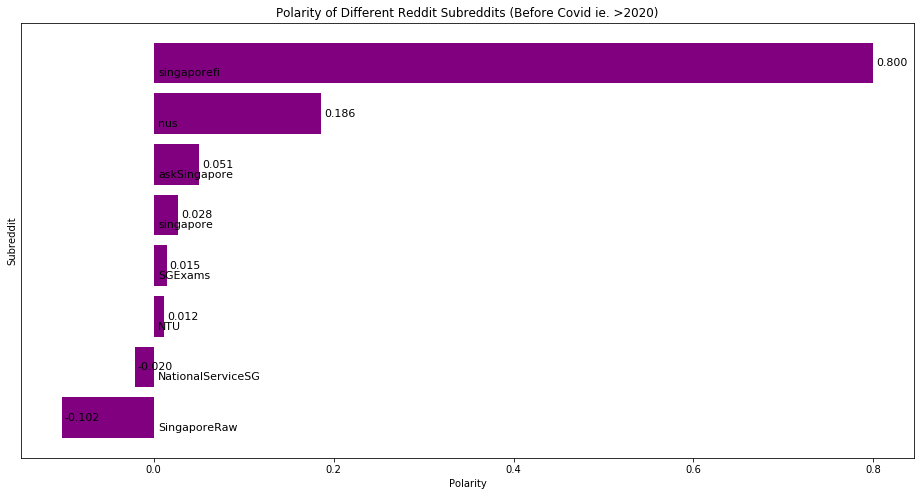

In [14]:
# calculate sentiment polarity
from textblob import TextBlob
def polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        if type(text) == float:
            pass

# precovid stat calc
pre = df[df["created_utc"] < "2020-01-01"]
subreddit_polarity_sorted=pd.DataFrame(pre.groupby('subreddit')['polarity'].mean().sort_values(ascending=True))
# plot setting
plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Subreddit')
plt.title('Polarity of Different Reddit Subreddits (Before Covid ie. >2020)')
polarity_graph=plt.barh(np.arange(len(subreddit_polarity_sorted.index)),subreddit_polarity_sorted['polarity'],color='purple',)
# writing names on bar
for bar,subreddit in zip(polarity_graph,subreddit_polarity_sorted.index):
  plt.text(0.005, bar.get_y() + 0.2,'{}'.format(subreddit),va='center',fontsize=11,color='black')
# writing polarity values on graph
for bar,polarity in zip(polarity_graph,subreddit_polarity_sorted['polarity']):
  plt.text(bar.get_width() + 0.003, bar.get_y() + 0.4,'%.3f'%polarity,va='center', fontsize = 11, color = 'black')
# display plot
plt.yticks([])
plt.show()

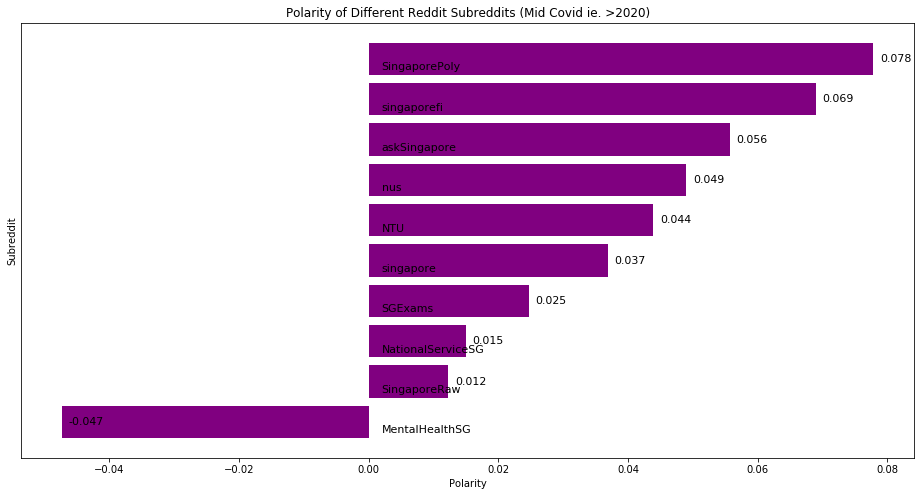

In [15]:
# midcovid stat calc
mid = df[df["created_utc"] > "2020-01-01"]
subreddit_polarity_sorted=pd.DataFrame(mid.groupby('subreddit')['polarity'].mean().sort_values(ascending=True))
# plot setting
plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Subreddit')
plt.title('Polarity of Different Reddit Subreddits (Mid Covid ie. >2020)')
polarity_graph=plt.barh(np.arange(len(subreddit_polarity_sorted.index)),subreddit_polarity_sorted['polarity'],color='purple',)
# writing names on bar
for bar,subreddit in zip(polarity_graph,subreddit_polarity_sorted.index):
  plt.text(0.002,bar.get_y()+0.2,'{}'.format(subreddit),va='center',fontsize=11,color='black')
# writing polarity values on graph
for bar,polarity in zip(polarity_graph,subreddit_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+0.4,'%.3f'%polarity,va='center', fontsize = 11, color = 'black')
# display plot
plt.yticks([])
plt.show()

## Distribution of Polarity Score Comparison btw Overall, Pre & Mid Covid Period

Text(0.5, 0.98, 'Sentiment Polarity Distribution for Overall Data')

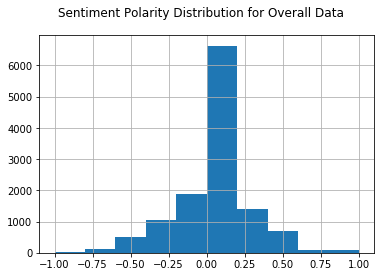

In [16]:
# polarity histogram (overall)
import pylab as pl
df['polarity'].hist()
pl.suptitle("Sentiment Polarity Distribution for Overall Data")

Text(0.5, 0.98, 'Sentiment Polarity Distribution for Pre-Covid Posts')

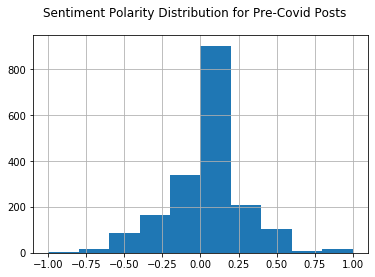

In [17]:
# polarity histogram for pre-covid period
pre['polarity'].hist()
pl.suptitle("Sentiment Polarity Distribution for Pre-Covid Posts")

Text(0.5, 0.98, 'Sentiment Polarity Distribution for Mid-Covid Posts')

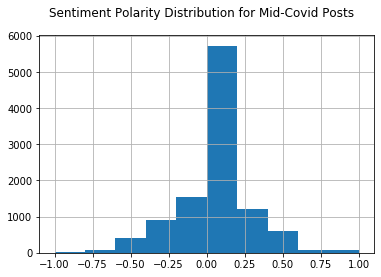

In [18]:
# polarity histogram for mid-covid period
mid['polarity'].hist()
pl.suptitle("Sentiment Polarity Distribution for Mid-Covid Posts")

## Compare Frequency of Words under different Sentiment Groups Used

"\nalternative method:\n# sentiment analysis using vader\nfrom nltk.sentiment.vader import SentimentIntensityAnalyzer\nnltk.download('vader_lexicon')\nsid = SentimentIntensityAnalyzer()\n\ndef get_vader_score(sent):\n    # polarity score returns dictionary\n    ss = sid.polarity_scores(sent)\n    # return ss\n    return np.argmax(list(ss.values())[:-1])\n\ndf['polarity_t'] = input['clean_selftext'].    map(lambda x: get_vader_score(x))\npolarity = df['polarity_t'].replace({0:'neg',1:'neu',2:'pos'})\n\nplt.bar(polarity.value_counts().index,\n        polarity.value_counts())\n\n# display sample with negative sentiment\ndf[df['polarity_t']==2]['clean_selftext']\n"

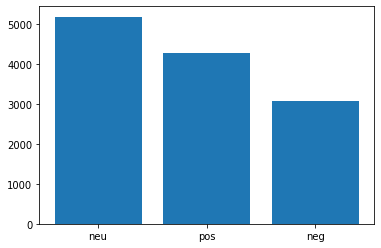

In [19]:
# compare freq of sentiment (using polarity)
def sentiment(x):
    if x < -0.05:
        return 'neg'
    elif x >= -0.05 and x <= 0.05:
        return 'neu'
    else:
        return 'pos'

df['polarity_s'] = df['polarity'].\
   map(lambda x: sentiment(x))
plt.bar(df.polarity_s.value_counts().index,
        df.polarity_s.value_counts())

"""
alternative method:
# sentiment analysis using vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    # return ss
    return np.argmax(list(ss.values())[:-1])

df['polarity_t'] = input['clean_selftext'].\
    map(lambda x: get_vader_score(x))
polarity = df['polarity_t'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(polarity.value_counts().index,
        polarity.value_counts())

# display sample with negative sentiment
df[df['polarity_t']==2]['clean_selftext']
"""

In [20]:
# display examples of negative sentiment instances
df[df['polarity_s']=='neg']['clean_selftext'].head()

3     long period time sit really reflect unsolvable...
4     facing severe adjustment problem mental breakd...
10    hear lot people saying mental disorder life ru...
11    myself disorder separation anxiety disorder na...
20    many thing want get chest first off growing re...
Name: clean_selftext, dtype: object

# 5. Sentiment Across Time

In [22]:
# 
import altair as alt
import pandas as pd
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
def sentiment_scores(sentence):
    sentence['positive'] = 0
    sentence['negative'] = 0
    sentence['neutral'] = 0
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(str(sentence['title'])+str(sentence['selftext']))
    sentence['positive_percentage'] = sentiment_dict['pos']*100
    sentence['negative_percentage'] = sentiment_dict['neg']*100
    sentence['neutral_percentage'] = sentiment_dict['neu']*100
     
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        sentence['positive'] = 1
    elif sentiment_dict['compound'] <= - 0.05 :
        sentence['negative'] = 1
    else :
        sentence['neutral'] = 1 
    return sentence

sentiment_analysis = df.apply(sentiment_scores, axis=1)
sentiment_analysis_group = sentiment_analysis.groupby('created_utc')['positive', 'negative', 'neutral'].sum().reset_index()
sentiment_analysis_df = sentiment_analysis_group[['positive', 'negative', 'neutral', 'created_utc']].melt(id_vars='created_utc')
sentiment_analysis_df.head(2)
selection = alt.selection_multi(fields=['color'], bind='legend')

sentiment_trend = alt.Chart(sentiment_analysis_df, title='Sentiment Analysis Trend').mark_line().encode(
        x=alt.X(
            "created_utc",
            axis=alt.Axis(title="created_utc")
        ),
        y='value',
        color='variable:N',
    ).properties(
        width=800,
        height=400
    ).configure_axisX(
        labelAngle=-45,
    ).interactive().add_selection(
        selection
    )

sentiment_trend

C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


alt.Chart(...)

## Further Analysis of Sentiment with Wordcloud

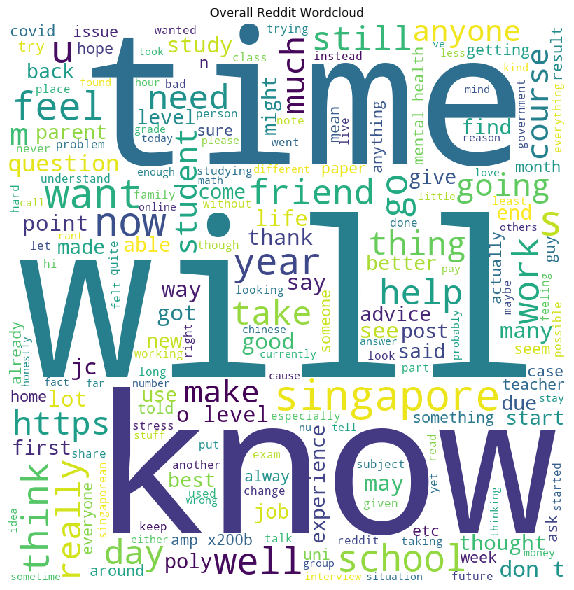

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('im')
stopwords.add('one')
stopwords.add('people')
stopwords.add('even')
 
# iterate through the csv file
for columns, details in df.iterrows():
    val = str(details['title']) +" "+ str(details['selftext'])

    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.title('Overall Reddit Wordcloud')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

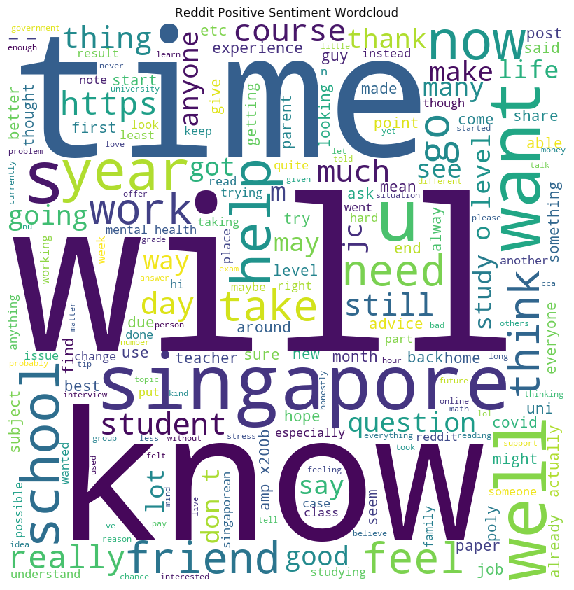

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('im')
stopwords.add('one')
stopwords.add('people')
stopwords.add('even')
 
# iterate through the csv file
for columns, details in sentiment_analysis[sentiment_analysis['positive']==1].iterrows():
    val = str(details['title']) +" "+ str(details['selftext'])

    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.title('Reddit Positive Sentiment Wordcloud')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

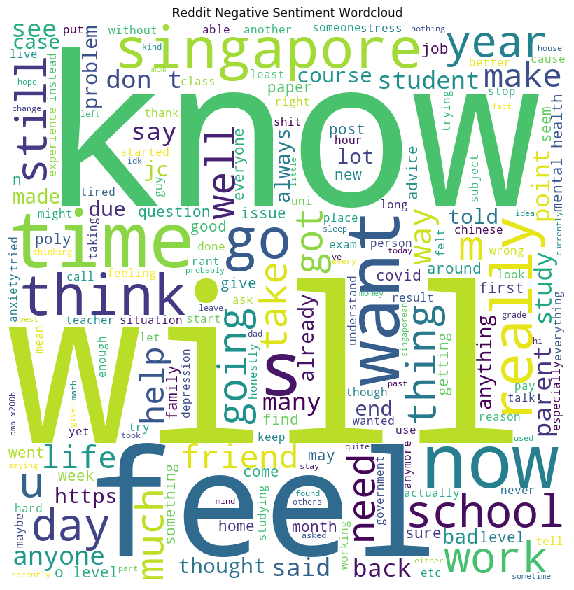

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('im')
stopwords.add('one')
stopwords.add('people')
stopwords.add('even')
 
# iterate through the csv file
for columns, details in sentiment_analysis[sentiment_analysis['negative']==1].iterrows():
    val = str(details['title']) +" "+ str(details['selftext'])

    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.title('Reddit Negative Sentiment Wordcloud')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

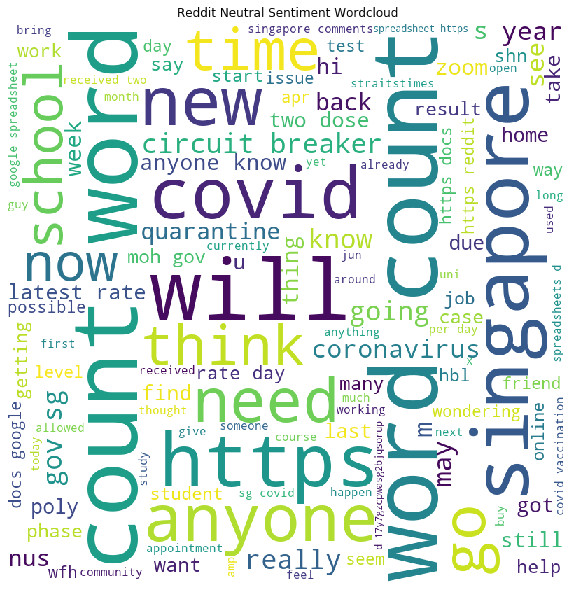

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('im')
stopwords.add('one')
stopwords.add('people')
stopwords.add('even')
 
# iterate through the csv file
for columns, details in sentiment_analysis[sentiment_analysis['neutral']==1].iterrows():
    val = str(details['title']) +" "+ str(details['selftext'])

    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud)
plt.title('Reddit Neutral Sentiment Wordcloud')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# 6. Frquency of Post over Time

## Frequency of Posts Across Time

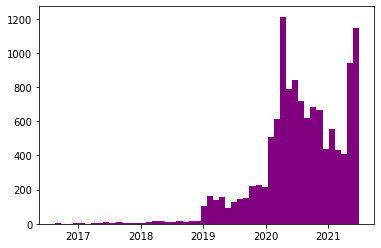

In [54]:
"""
Very pretty plot, but there is bug for x axis! -- note to Rhey 
Should use this rather than the one below if code can be debugged

import altair as alt
import pandas as pd
date_count = df.groupby('created_utc')['created_utc'].count().to_frame()
date_count = date_count.rename(columns={'created_utc': 'count'})
date_count = date_count.reset_index()
alt.renderers.enable('default') 
selection = alt.selection_multi(fields=['count'], bind='legend')
trend = alt.Chart(date_count, title="Reddit Overall Trend").mark_line().encode(
    x=alt.X(
        "created_utc",
        axis=alt.Axis(title="created_utc")
    ),
    y='count',
).properties(
    width=800,
    height=400
).configure_axisX(
    labelAngle=-45,
).interactive().add_selection(
    selection
)
trend
"""

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

dates = mdates.datestr2num(df["created_utc"].tolist())
fig, ax = plt.subplots(1,1)
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.hist(dates, bins=50, color='purple')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
plt.show()

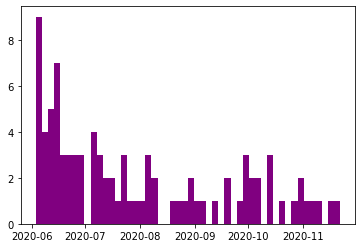

In [55]:
# for specfic subreddit:
# note that mentalhealthsg is created only Jun 3, 2020
mentalhealth = df[df["subreddit"] == "MentalHealthSG"]
dates = mentalhealth["created_utc"].tolist()
dates = mdates.datestr2num(mentalhealth["created_utc"].tolist())
fig, ax = plt.subplots(1,1)
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.hist(dates, bins=50, color='purple')
# ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))

# 7. Others

## Types of Words Used

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\20jam\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


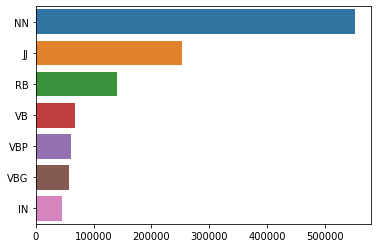

In [57]:
# freq barplot for type of words used - noun, adj, verb etc.
from collections import Counter
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy
import nltk
#nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

def pos(text):
    pos = nltk.pos_tag(word_tokenize(text))
    pos = list(map(list,zip(*pos)))[1]
    return pos

tags = df['clean_selftext'].apply(lambda x : pos(x))
tags = [x for l in tags for x in l]
counter = Counter(tags)

x,y = list(map(list,zip(*counter.most_common(7))))
sns.barplot(x = y,y = x)

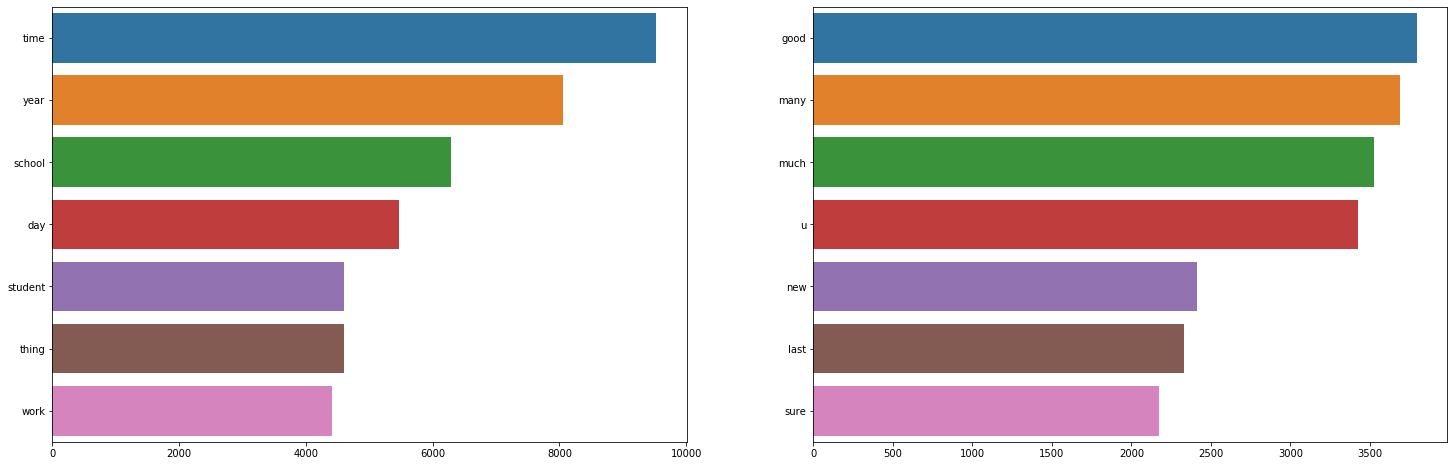

In [ ]:
# most commonly used -
from collections import Counter
from nltk.tokenize import word_tokenize
def get_adjs(text, type_tag): # tag = "NN" noun, "JJ" adjectives, 
    adj = []
    pos = nltk.pos_tag(word_tokenize(text))
    for word, tag in pos:
        if tag == type_tag:
            adj.append(word)
    return adj

fig, axs = plt.subplots(ncols = 2, figsize = (25, 8))
# noun
words = df["clean_selftext"].apply(lambda x : get_adjs(x, type_tag = "NN"))
words = [x for l in words for x in l]
counter = Counter(words)
x,y = list(map(list,zip(*counter.most_common(7))))
sns.barplot(x = y,y = x, ax = axs[0])
# adjective
words = df["clean_selftext"].apply(lambda x : get_adjs(x, type_tag = "JJ"))
words = [x for l in words for x in l]
counter = Counter(words)
x,y = list(map(list,zip(*counter.most_common(7))))
sns.barplot(x = y,y = x, ax = axs[1])